In [69]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from dython.nominal import cramers_v, correlation_ratio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
 

 Data Understanding::

In [70]:
#Reading Data 
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [71]:
#Check the shape of the dataset
print(" Data Shape \n")
df.shape

 Data Shape 



(19158, 14)

#Exploratory Data Analysis (EDA)

Checking Data Info and Statistical Data::

In [72]:
#Check the data types and null count by columns
print(" Data INFO \n")
df.info()

 Data INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), 

In [73]:
df["target"]=df["target"].astype('int64')

In [74]:
#Check the summary statistics of all numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [75]:
#Check the summary statistics of all object columns
df.describe(include = 'object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


Data Cleaning:

In [76]:
#Count the missing values by column in the dataset
print("MISSING VALUES:")
print(df.isna().sum().sort_values(ascending=False))

MISSING VALUES:
company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64


In [77]:
for Columns in ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']:
    df[Columns + "_Imputed"] = df[Columns]
    df[Columns + "_Imputed"].fillna(df[Columns].mode()[0],inplace=True)

#Drop actual columns
df = df.drop(['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'], axis = 1)
   
#reorder the dataframe
df = df[['enrollee_id','city','city_development_index','gender_Imputed','relevent_experience','enrolled_university_Imputed','education_level_Imputed','major_discipline_Imputed','experience_Imputed','company_size_Imputed','company_type_Imputed','last_new_job_Imputed','training_hours','target']]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   enrollee_id                  19158 non-null  int64  
 1   city                         19158 non-null  object 
 2   city_development_index       19158 non-null  float64
 3   gender_Imputed               19158 non-null  object 
 4   relevent_experience          19158 non-null  object 
 5   enrolled_university_Imputed  19158 non-null  object 
 6   education_level_Imputed      19158 non-null  object 
 7   major_discipline_Imputed     19158 non-null  object 
 8   experience_Imputed           19158 non-null  object 
 9   company_size_Imputed         19158 non-null  object 
 10  company_type_Imputed         19158 non-null  object 
 11  last_new_job_Imputed         19158 non-null  object 
 12  training_hours               19158 non-null  int64  
 13  target          

visualization

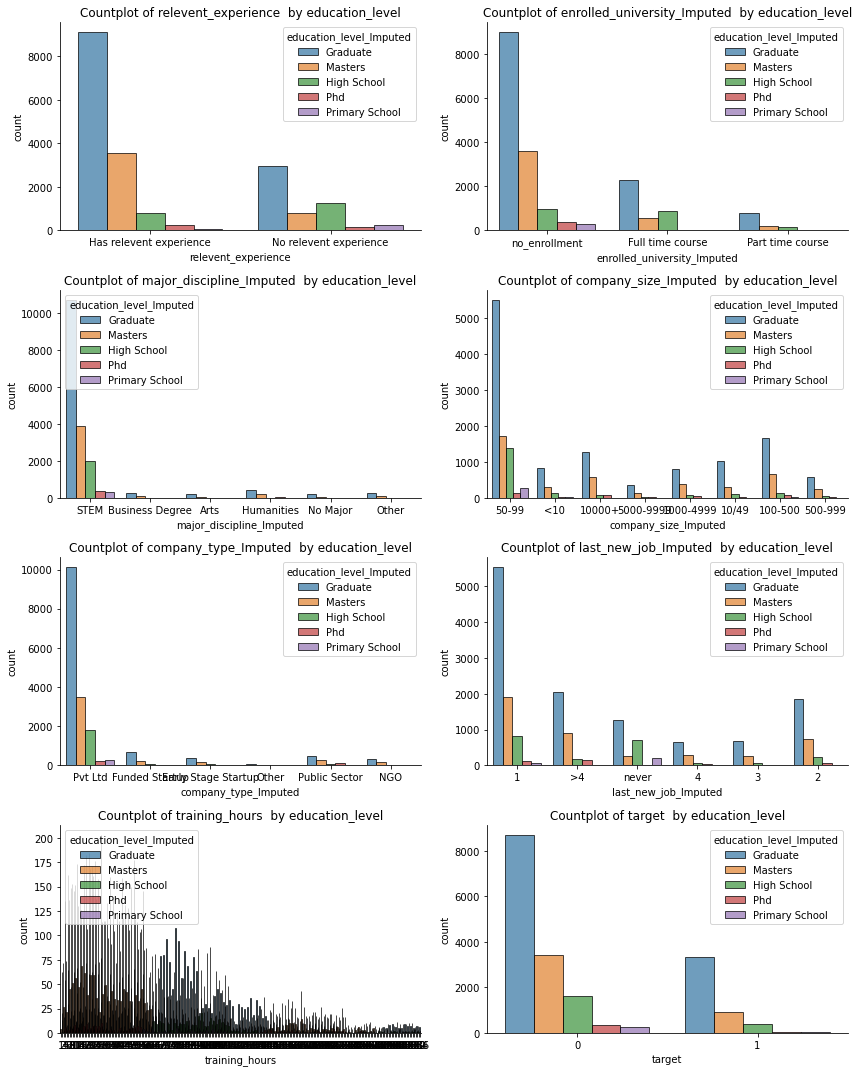

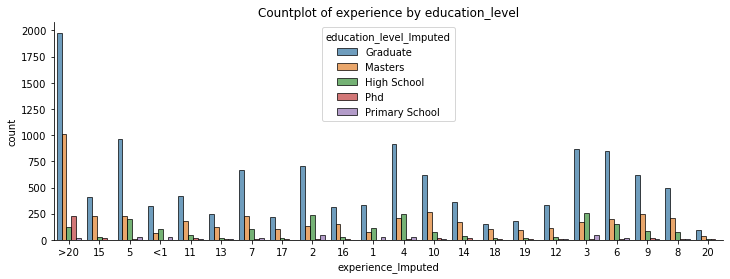

In [79]:
plt.figure(figsize=[12,15])
fet=["relevent_experience","enrolled_university_Imputed","major_discipline_Imputed", "company_size_Imputed","company_type_Imputed","last_new_job_Imputed", "training_hours","target"]
n=1
for r in fet:
    plt.subplot(4,2,n)
    sns.countplot(x=r, hue='education_level_Imputed', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(r))
    n=n+1
plt.tight_layout()
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(x='experience_Imputed', hue='education_level_Imputed',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

enrolle_id is an meaningless feature that is a unique value for each employee.

In [80]:
df = df.drop(columns=["enrollee_id"])

Exploratory Data Analytics and Data Preprocessing::

1. City:

In [81]:
df.city.nunique()

123

In [82]:
df.city.value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

convert to numerical

In [83]:
df["city"]=df["city"].str.replace('city_','')
df["city"]=df["city"].astype('int64')
df.city.value_counts()

103    4355
21     2702
16     1533
114    1336
160     845
       ... 
129       3
111       3
121       3
140       1
171       1
Name: city, Length: 123, dtype: int64

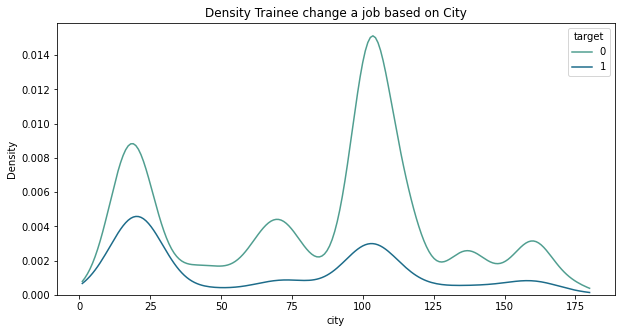

In [84]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="city", hue="target",cut = 0,palette="crest")
plt.title('Density Trainee change a job based on City')
plt.show()

From KDEPlot above ,and the above table, we find that the 'city' feature has upto 123 unique values, and would not contribute much, hence we drop the feature.

In [85]:
df = df.drop(columns=["city"])

2.City Development Index

In [86]:
df.city_development_index.value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

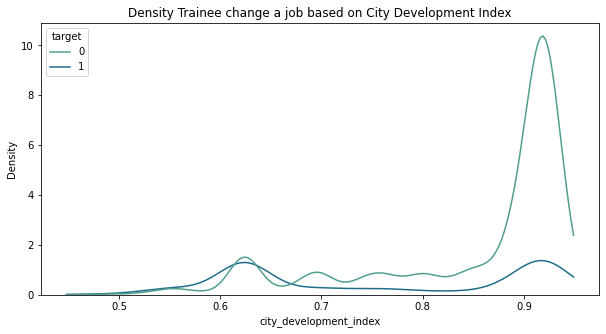

In [87]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="city_development_index", hue="target",cut = 0,palette="crest")
plt.title('Density Trainee change a job based on City Development Index')
plt.show()

Based on KDEPlot above, City with higher development index is less likely have trainee who wants to change their job

3. Gender

In [88]:
df.gender_Imputed.value_counts()

Male      17729
Female     1238
Other       191
Name: gender_Imputed, dtype: int64

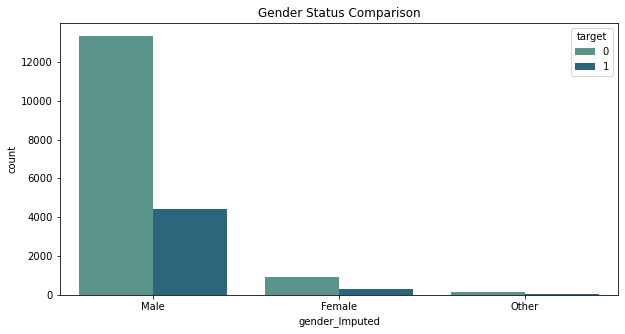

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.gender_Imputed,hue=df.target, data=df, palette='crest')
plt.title('Gender Status Comparison')
plt.show()

Here we see that the number of men is higher than the others.

4.Relevant Experience

In [90]:
df.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

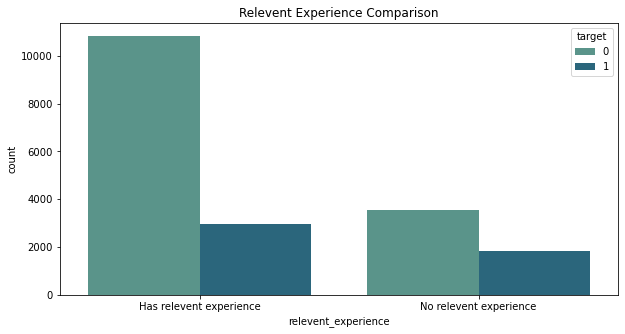

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.relevent_experience,hue=df.target, data=df, palette='crest')
plt.title('Relevent Experience Comparison')
plt.show()

We see that there are more trainee with relevant experience.

5.Enrolled_university

In [92]:
df.enrolled_university_Imputed.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university_Imputed, dtype: int64

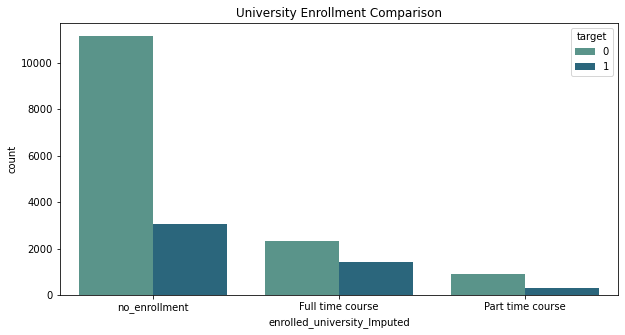

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.enrolled_university_Imputed,hue=df.target, data=df, palette='crest')
plt.title('University Enrollment Comparison')
plt.show()

Trainee who take the training Full Course are trainee who have intention to change their job.

6.Education_level

In [94]:
df.education_level_Imputed.value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level_Imputed, dtype: int64

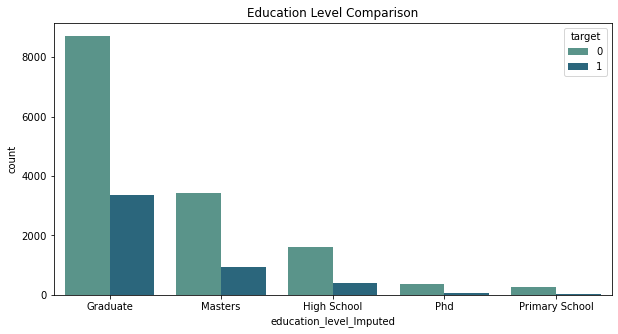

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.education_level_Imputed,hue=df.target, data=df, palette='crest')
plt.title('Education Level Comparison')
plt.show()

We see the distribution of the education level feature within the data,It consists mostly of graduates.

7.major_discipline

In [96]:
df.major_discipline_Imputed.value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline_Imputed, dtype: int64

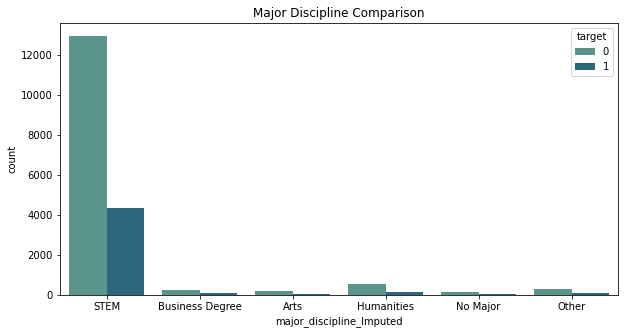

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.major_discipline_Imputed,hue=df.target, data=df, palette='crest')
plt.title('Major Discipline Comparison')
plt.show()

We see that the number of STEMs is quite high compared to others

8.experience

In [98]:
df.experience_Imputed.value_counts()

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience_Imputed, dtype: int64

We see that the number of (experance>20) is quite high compared to others. 

In [99]:
df.experience_Imputed=df.experience_Imputed.replace({'<1' : '0','>20': '21'})
df.experience_Imputed.value_counts()

21    3351
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
0      522
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience_Imputed, dtype: int64

In [100]:
df['experience_Imputed']=df['experience_Imputed'].astype('int64')

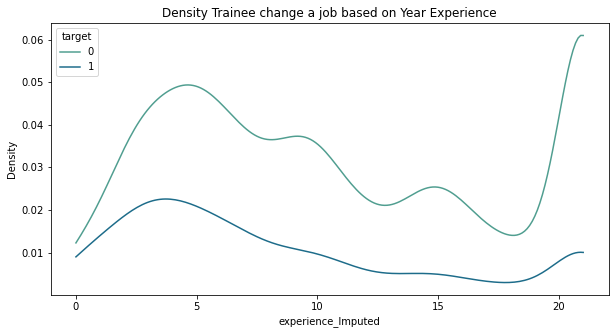

In [101]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="experience_Imputed", hue="target",cut = 0,palette='crest')
plt.title('Density Trainee change a job based on Year Experience')
plt.show()

Trainee with working experience 1 - 5 years are more likely to change their job and the trend is decline afterwards

9.Company_size

In [102]:
df.company_size_Imputed.value_counts()

50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size_Imputed, dtype: int64

In [103]:
company_size_mapping = {'<10': 1,'10/49': 2,'50-99': 3, '100-500': 4,'500-999': 5,'1000-4999': 6,'5000-9999': 7,'10000+': 8}
df['company_size_Imputed'] = df['company_size_Imputed'].map(company_size_mapping)

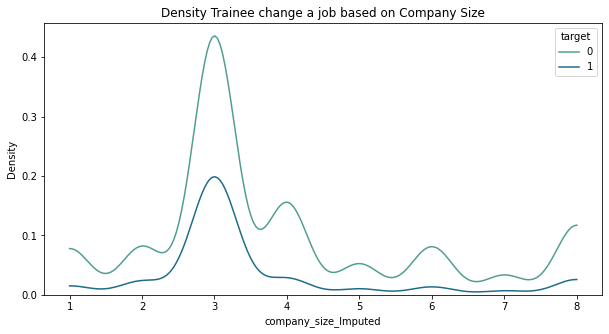

In [104]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="company_size_Imputed", hue="target",cut = 0,palette='crest')
plt.title('Density Trainee change a job based on Company Size')
plt.show()

Trainee who working in company size level 3 which is contains of 50-99 Employee have the highest density to change their job

10.Company_type

In [105]:
df.company_type_Imputed.value_counts()

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type_Imputed, dtype: int64

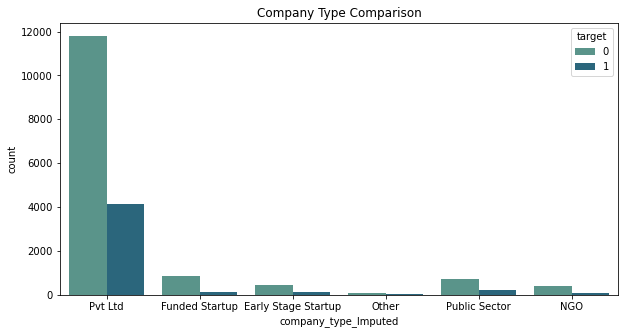

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["company_type_Imputed"],hue=df["target"], data=df, palette='crest')
plt.title('Company Type Comparison')
plt.show()

Trainee who works at private company have the highest percentage of changing job.

11.Last_new_job

In [107]:
df.last_new_job_Imputed.value_counts()

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job_Imputed, dtype: int64

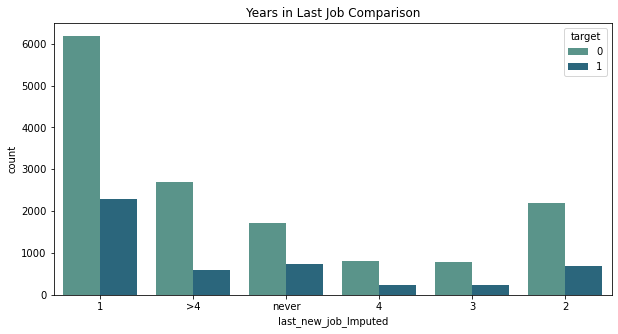

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["last_new_job_Imputed"],hue=df["target"], data=df, palette='crest')
plt.title('Years in Last Job Comparison')
plt.show()

Trainee who working 1 year in their last job tend to be Data Scientist after taking the course. 

12.Training_hours

In [109]:
df.training_hours.value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

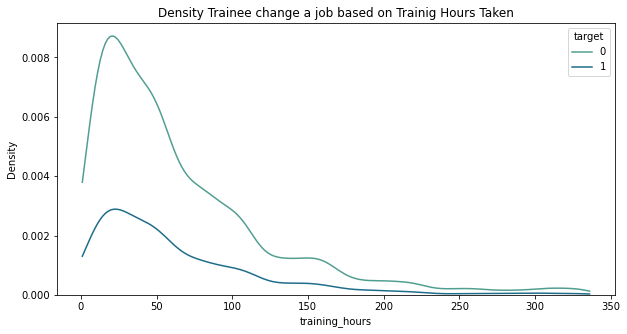

In [110]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='crest')
plt.title('Density Trainee change a job based on Trainig Hours Taken')
plt.show()

Trainee who took training up to 25 hours tend to change their job into Data Scientistc.

In [111]:
df.head()

,city_development_index,gender_Imputed,relevent_experience,enrolled_university_Imputed,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,3,Pvt Ltd,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3,Pvt Ltd,>4,47,0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,3,Pvt Ltd,never,83,0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,3,Pvt Ltd,never,52,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,3,Funded Startup,4,8,0


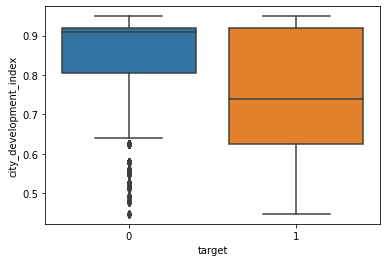

In [112]:
sns.boxplot(x='target', y='city_development_index', data=df);

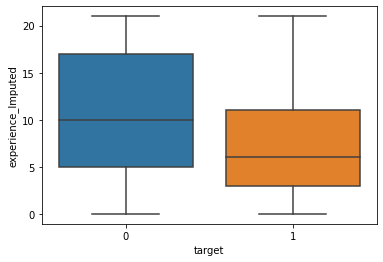

In [113]:
sns.boxplot(x='target', y='experience_Imputed', data=df);

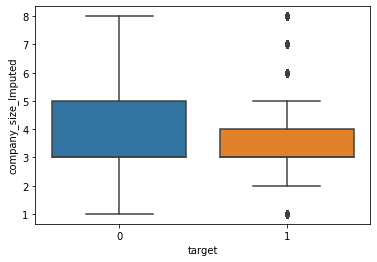

In [114]:
sns.boxplot(x='target', y='company_size_Imputed', data=df);

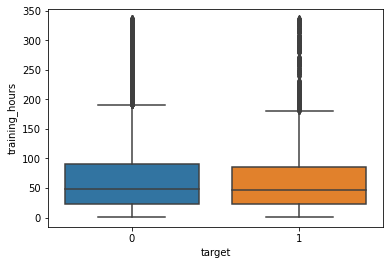

In [115]:
sns.boxplot(x='target', y='training_hours', data=df);

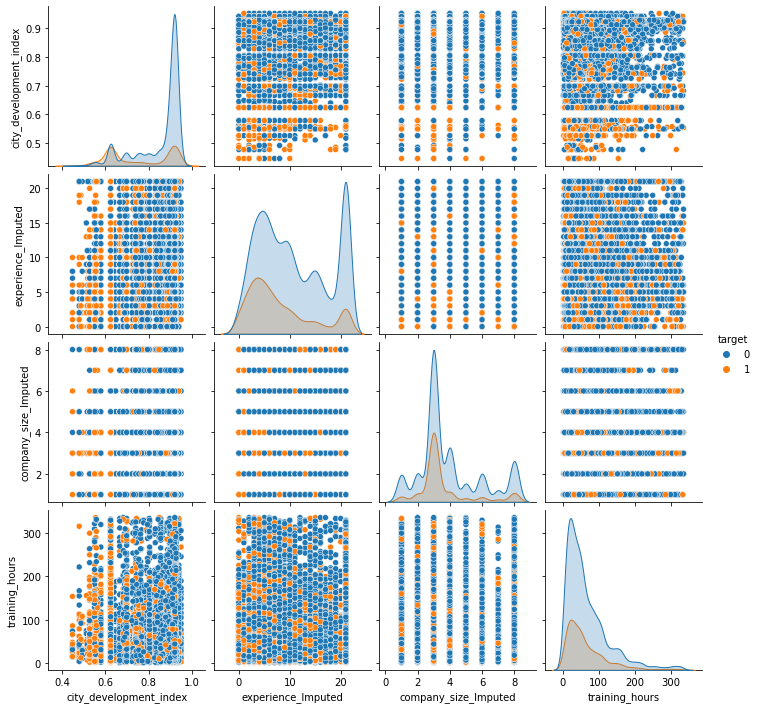

In [116]:
sns.pairplot(df,diag_kind='kde',hue='target')

In [117]:
# Making Dictionaries of ordinal features


relev_exp={
    "No relevent experience":0,
    "Has relevent experience":1
}

edu_lev={
    "Primary School":0,
    "High School":1,
    "Graduate":2,
    "Masters":3,
    "Phd":4
}

las_job={
    "never":0,
    "1":1,
    "2":2,
    "3":3,
    "4":4,
    ">4":5
}


In [118]:
# Transforming Categorical features into numarical features

df["relevent_experience"]=df["relevent_experience"].map(relev_exp)

df["education_level_Imputed"]=df["education_level_Imputed"].map(edu_lev)

df["last_new_job_Imputed"]=df["last_new_job_Imputed"].map(las_job)

df=pd.get_dummies(df,drop_first=True)

In [119]:
df.head()

,city_development_index,relevent_experience,education_level_Imputed,experience_Imputed,company_size_Imputed,last_new_job_Imputed,training_hours,target,gender_Imputed_Male,gender_Imputed_Other,...,major_discipline_Imputed_Business Degree,major_discipline_Imputed_Humanities,major_discipline_Imputed_No Major,major_discipline_Imputed_Other,major_discipline_Imputed_STEM,company_type_Imputed_Funded Startup,company_type_Imputed_NGO,company_type_Imputed_Other,company_type_Imputed_Public Sector,company_type_Imputed_Pvt Ltd
0,0.920,1,2,21,3,1,36,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0.776,0,2,15,3,5,47,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0,2,5,3,0,83,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.789,0,2,0,3,0,52,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0.767,1,3,21,3,4,8,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   city_development_index                        19158 non-null  float64
 1   relevent_experience                           19158 non-null  int64  
 2   education_level_Imputed                       19158 non-null  int64  
 3   experience_Imputed                            19158 non-null  int64  
 4   company_size_Imputed                          19158 non-null  int64  
 5   last_new_job_Imputed                          19158 non-null  int64  
 6   training_hours                                19158 non-null  int64  
 7   target                                        19158 non-null  int64  
 8   gender_Imputed_Male                           19158 non-null  uint8  
 9   gender_Imputed_Other                          19158 non-null 

Checking independency::

In [121]:
#split data
X = df.drop(columns='target')
Y = df['target']

Handling Imbalance in Data

In [122]:
num_0 = len(df[df['target']==0])
num_1 = len(df[df['target']==1])

print('Number of The minority sample:',num_0,'\n''Number of The majority sample',num_1)

Number of The minority sample: 14381 
Number of The majority sample 4777


<AxesSubplot:xlabel='target', ylabel='count'>

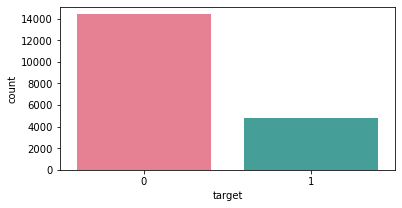

In [123]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='target', palette ='husl')

We use SMOTE to oversample the imbalanced class

In [124]:

smote = SMOTE(sampling_strategy='not majority')
X_smote, Y_smote = smote.fit_resample(X,Y)

num_0 = X_smote.shape[0]
num_1 =Y_smote.shape[0]

print('Number of The minority sample:',num_0,'\n''Number of The majority sample',num_1)


Number of The minority sample: 28762 
Number of The majority sample 28762


In [125]:
#Splitting Train\Validation\Test
X,X_test,Y,Y_test = train_test_split(X_smote,Y_smote,test_size=.2,random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=.25,random_state=42)

In [126]:
X.shape,X_test.shape,X_train.shape,X_val.shape

((23009, 21), (5753, 21), (17256, 21), (5753, 21))

Modelling

In [127]:
#Scaling the data using standardization
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_val= scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [128]:
#Applay RandomForestClassifier
# Initiatlize the model
model=RandomForestClassifier(n_jobs=-1, random_state=42)
# Fit the model
model.fit(scaled_X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [129]:
cross_val_score(model,scaled_X_val,Y_val)

array([0.76107732, 0.76976542, 0.77932233, 0.7626087 , 0.77304348])

In [130]:
# Predict data points 
y_pred_random_forest = model.predict(scaled_X_test)
print(y_pred_random_forest)

[1 0 0 ... 1 1 0]


In [131]:
print(Y_test)

5799     1
13912    0
9212     0
22978    1
25197    1
        ..
24751    1
2412     0
24131    1
21654    1
16424    0
Name: target, Length: 5753, dtype: int64


Model Evaluation::

In [132]:
# Print  scores
print("\n\nTesting Results:\n")
print(classification_report(Y_test,y_pred_random_forest))



Testing Results:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2877
           1       0.80      0.81      0.81      2876

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



RandomForestClassifier::We get an precision score of 80%

Feature Importance

Feature: 0, Score: 0.27821
Feature: 1, Score: 0.03100
Feature: 2, Score: 0.04686
Feature: 3, Score: 0.12982
Feature: 4, Score: 0.08363
Feature: 5, Score: 0.06087
Feature: 6, Score: 0.22847
Feature: 7, Score: 0.01286
Feature: 8, Score: 0.00271
Feature: 9, Score: 0.01453
Feature: 10, Score: 0.03445
Feature: 11, Score: 0.00385
Feature: 12, Score: 0.00684
Feature: 13, Score: 0.00346
Feature: 14, Score: 0.00413
Feature: 15, Score: 0.01344
Feature: 16, Score: 0.01336
Feature: 17, Score: 0.00681
Feature: 18, Score: 0.00171
Feature: 19, Score: 0.00813
Feature: 20, Score: 0.01486


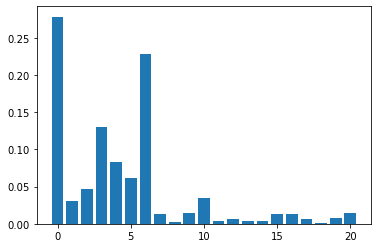

In [133]:
# get importance
importance=model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Based on the bar plot above  we drop all feature except city_development_index,experience_Imputed and training_hours.

In [134]:
df

,city_development_index,relevent_experience,education_level_Imputed,experience_Imputed,company_size_Imputed,last_new_job_Imputed,training_hours,target,gender_Imputed_Male,gender_Imputed_Other,...,major_discipline_Imputed_Business Degree,major_discipline_Imputed_Humanities,major_discipline_Imputed_No Major,major_discipline_Imputed_Other,major_discipline_Imputed_STEM,company_type_Imputed_Funded Startup,company_type_Imputed_NGO,company_type_Imputed_Other,company_type_Imputed_Public Sector,company_type_Imputed_Pvt Ltd
0,0.920,1,2,21,3,1,36,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0.776,0,2,15,3,5,47,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0,2,5,3,0,83,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.789,0,2,0,3,0,52,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0.767,1,3,21,3,4,8,0,1,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,2,14,3,1,42,1,1,0,...,0,1,0,0,0,0,0,0,0,1
19154,0.920,1,2,14,3,4,52,1,1,0,...,0,0,0,0,1,0,0,0,0,1
19155,0.920,1,2,21,3,4,44,0,1,0,...,0,0,0,0,1,0,0,0,0,1
19156,0.802,1,1,0,5,2,97,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [135]:
df = df.drop(['relevent_experience','education_level_Imputed','company_size_Imputed','last_new_job_Imputed','gender_Imputed_Male','gender_Imputed_Other','enrolled_university_Imputed_Part time course','enrolled_university_Imputed_no_enrollment','major_discipline_Imputed_Business Degree','major_discipline_Imputed_Humanities','major_discipline_Imputed_No Major','major_discipline_Imputed_Other','major_discipline_Imputed_STEM','company_type_Imputed_Funded Startup','company_type_Imputed_NGO','company_type_Imputed_Other','company_type_Imputed_Public Sector','company_type_Imputed_Pvt Ltd'], axis = 1)
df

,city_development_index,experience_Imputed,training_hours,target
0,0.920,21,36,1
1,0.776,15,47,0
2,0.624,5,83,0
3,0.789,0,52,1
4,0.767,21,8,0
...,...,...,...,...
19153,0.878,14,42,1
19154,0.920,14,52,1
19155,0.920,21,44,0
19156,0.802,0,97,0


We replay The model after update the dataset.

In [136]:
#split data
X = df.drop(columns='target')
Y = df['target']

Handling Imbalance in Data

We use SMOTE to oversample the imbalanced class

In [137]:

smote = SMOTE(sampling_strategy='not majority')
X_smote, Y_smote = smote.fit_resample(X,Y)

num_0 = X_smote.shape[0]
num_1 =Y_smote.shape[0]

print('Number of The minority sample:',num_0,'\n''Number of The majority sample',num_1)


Number of The minority sample: 28762 
Number of The majority sample 28762


In [138]:
#Splitting Train\Validation\Test
X,X_test,Y,Y_test = train_test_split(X_smote,Y_smote,test_size=.2,random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=.25,random_state=42)

In [139]:
#Scaling the data using standardization
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_val= scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [140]:
#Applay RandomForestClassifier
# Initiatlize the model
model=RandomForestClassifier(n_jobs=-1, random_state=42)
# Fit the model
model.fit(scaled_X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [141]:
cross_val_score(model,scaled_X_val,Y_val)

array([0.68809731, 0.70026064, 0.71242398, 0.69565217, 0.7026087 ])

In [142]:
# Predict data points 
y_pred_random_forest = model.predict(scaled_X_test)
print(y_pred_random_forest)

[1 1 0 ... 0 1 0]


In [144]:
# predict probability on X_test
y_pred = model.predict_proba(scaled_X_test[:,:3])
print(y_pred)

[[0.         1.        ]
 [0.08       0.92      ]
 [0.95733333 0.04266667]
 ...
 [0.53       0.47      ]
 [0.00945238 0.99054762]
 [0.8        0.2       ]]


[[2117  760]
 [ 777 2099]]


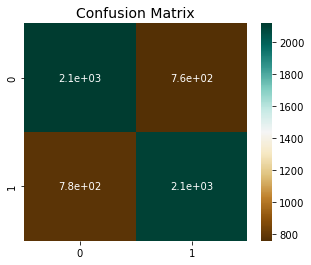

In [145]:
confmx1 = confusion_matrix(Y_test,y_pred_random_forest)
print(confmx1)

plt.figure(figsize=(5,4))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx1,annot=True ,cmap='BrBG');

In [146]:
# Print scores
print("\n\nTesting Results:\n")
print(classification_report(Y_test,y_pred_random_forest))



Testing Results:

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2877
           1       0.73      0.73      0.73      2876

    accuracy                           0.73      5753
   macro avg       0.73      0.73      0.73      5753
weighted avg       0.73      0.73      0.73      5753



RandomForestClassifier::We get an precision score of 73%

In [147]:
#Applay LogisticRegression

# Initiatlize the model
model_lr= LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

In [148]:
#Applay LogisticRegression

# Initiatlize the model
model_lr= LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

In [149]:
# Fit the model
model_lr.fit(scaled_X_train,Y_train)

LogisticRegression(max_iter=200, random_state=0, solver='saga', tol=0.01)

In [150]:
cross_val_score(model_lr,scaled_X_val,Y_val)

array([0.66898349, 0.68375326, 0.69504778, 0.66956522, 0.69304348])

In [151]:
# Predict data points 
y_pred_Ir = model_lr.predict(scaled_X_test)
print(y_pred_Ir)

[0 0 0 ... 0 1 0]


In [152]:
print(Y_test)

5799     1
13912    0
9212     0
22978    1
25197    1
        ..
24751    1
2412     0
24131    1
21654    1
16424    0
Name: target, Length: 5753, dtype: int64


In [154]:
# predict probability on X_test
y_pred = model_lr.predict_proba(scaled_X_test[:,:3])
print(y_pred)

[[0.64880459 0.35119541]
 [0.66848929 0.33151071]
 [0.67713269 0.32286731]
 ...
 [0.56216445 0.43783555]
 [0.2010872  0.7989128 ]
 [0.65124252 0.34875748]]


[[2155  722]
 [1193 1683]]


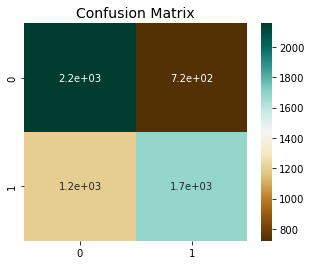

In [155]:
confmx2 = confusion_matrix(Y_test,y_pred_Ir)
print(confmx2)
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx2,annot=True ,cmap='BrBG');

Model Evaluation::

In [156]:
print("\n\nTesting Results:\n")
print(classification_report(Y_test,y_pred_Ir))



Testing Results:

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      2877
           1       0.70      0.59      0.64      2876

    accuracy                           0.67      5753
   macro avg       0.67      0.67      0.66      5753
weighted avg       0.67      0.67      0.66      5753



LogisticRegression::We get an precision score of 70%.

In [157]:
#Applay KNN
# Initiatlize the model
knn=KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn.fit(scaled_X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [158]:
cross_val_score(knn,scaled_X_val,Y_val)

array([0.62119896, 0.62554301, 0.65073849, 0.62608696, 0.63130435])

In [159]:
# Predict data points 
y_pred_knn = knn.predict(scaled_X_test)
print(y_pred_knn)

[1 1 0 ... 1 1 0]


In [160]:
print(Y_test)

5799     1
13912    0
9212     0
22978    1
25197    1
        ..
24751    1
2412     0
24131    1
21654    1
16424    0
Name: target, Length: 5753, dtype: int64


In [162]:
# predict probability on X_test
y_pred = knn.predict_proba(scaled_X_test[:,:3])
print(y_pred)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


[[1910  967]
 [ 969 1907]]


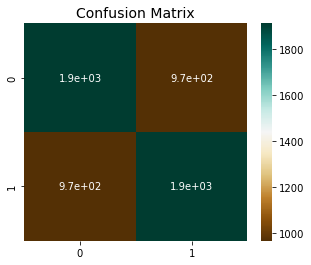

In [163]:
confmx3 = confusion_matrix(Y_test,y_pred_knn)
print(confmx3)
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx3,annot=True ,cmap='BrBG');

In [164]:
print("\n\nTesting Results:\n")
print(classification_report(Y_test, y_pred_knn))



Testing Results:

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      2877
           1       0.66      0.66      0.66      2876

    accuracy                           0.66      5753
   macro avg       0.66      0.66      0.66      5753
weighted avg       0.66      0.66      0.66      5753



KNeighborsClassifier::We get an precision score of 66%

In [165]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(scaled_X_train,Y_train)

DecisionTreeClassifier()

In [166]:
cross_val_score(dtc,scaled_X_val,Y_val)

array([0.71155517, 0.73675065, 0.72806255, 0.72      , 0.70695652])

In [167]:
y_pred_dtc = dtc.predict(scaled_X_test)
print(y_pred_dtc)

[1 1 0 ... 1 1 0]


In [169]:
# predict probability on X_test
y_pred = dtc.predict_proba(scaled_X_test[:,:3])
print(y_pred)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [170]:
print(Y_test)

5799     1
13912    0
9212     0
22978    1
25197    1
        ..
24751    1
2412     0
24131    1
21654    1
16424    0
Name: target, Length: 5753, dtype: int64


[[2214  663]
 [ 675 2201]]


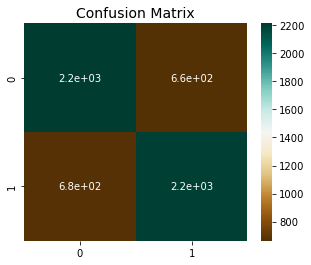

In [172]:
confmx4 = confusion_matrix(Y_test,y_pred_dtc)
print(confmx4)

plt.figure(figsize=(5,4))
plt.title('Confusion Matrix', size=14)
sns.heatmap(confmx4,annot=True ,cmap='BrBG');

In [173]:
print("\n\nTesting Results:\n")
print(classification_report(Y_test, y_pred_dtc))



Testing Results:

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2877
           1       0.77      0.77      0.77      2876

    accuracy                           0.77      5753
   macro avg       0.77      0.77      0.77      5753
weighted avg       0.77      0.77      0.77      5753



Decision Tree Classifier::We get an precision score of 77%

In [174]:

svm = SVC(probability=True)

# fit the model
svm.fit(scaled_X_train,Y_train)

SVC(probability=True)

In [175]:
cross_val_score(svm,scaled_X_val,Y_val)

array([0.66724587, 0.69417897, 0.69939183, 0.67913043, 0.68782609])

In [176]:
# predict labels on X_test
y_pred_svm = svm.predict(scaled_X_test)
y_pred_svm

In [177]:
# predict probability on X_test
y_pred_proba = svm.predict_proba(scaled_X_test[:,:3])
y_pred_proba

array([[0.67692898, 0.32307102],
       [0.6778949 , 0.3221051 ],
       [0.67742154, 0.32257846],
       ...,
       [0.59407573, 0.40592427],
       [0.25712756, 0.74287244],
       [0.70403217, 0.29596783]])

In [178]:
print("\n\nTesting Results:\n")
print(classification_report(Y_test,y_pred_svm))



Testing Results:

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2877
           1       0.71      0.58      0.64      2876

    accuracy                           0.67      5753
   macro avg       0.68      0.67      0.67      5753
weighted avg       0.68      0.67      0.67      5753



SVC::We get an precision score of 71%

The best Model to predict the target is the Decision Tree Classifier with simple train and test techniques with 77% on the test .

In [188]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier*', 'Random Forest Classifier','KNeighborsClassifier','Support Vector Classification'],
    'precision' : [0.70,0.77,0.80,0.73,0.66,0.71],
    'recall':[0.59,0.77,0.81,0.73,0.66 ,0.58],
    'f1-score':[0.64,0.77,0.81,0.73,0.66,0.64]
})


models.sort_values(by ='precision', ascending = False)

,Model,precision,recall,f1-score
2,Random Forest Classifier*,0.80,0.81,0.81
1,Decision Tree Classifier,0.77,0.77,0.77
3,Random Forest Classifier,0.73,0.73,0.73
5,Support Vector Classification,0.71,0.58,0.64
0,Logistic Regression,0.70,0.59,0.64
4,KNeighborsClassifier,0.66,0.66,0.66


********************************************************************************************
********************************************************************************************
********************************************************************************************